In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn import tree
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### Classifier #1 (number of heatwaves)

(3131, 57) (1343, 57) (3131,) (1343,)
Cross-validation scores: [0.87276786 0.87053571 0.86830357 0.89508929 0.79865772 0.83221477
 0.80089485 0.88143177 0.86129754 0.86800895]
Mean CV accuracy: 0.8549202021412592
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1068
           1       0.58      0.88      0.70       214
          2+       0.52      0.97      0.68        61

    accuracy                           0.85      1343
   macro avg       0.70      0.89      0.76      1343
weighted avg       0.90      0.85      0.86      1343



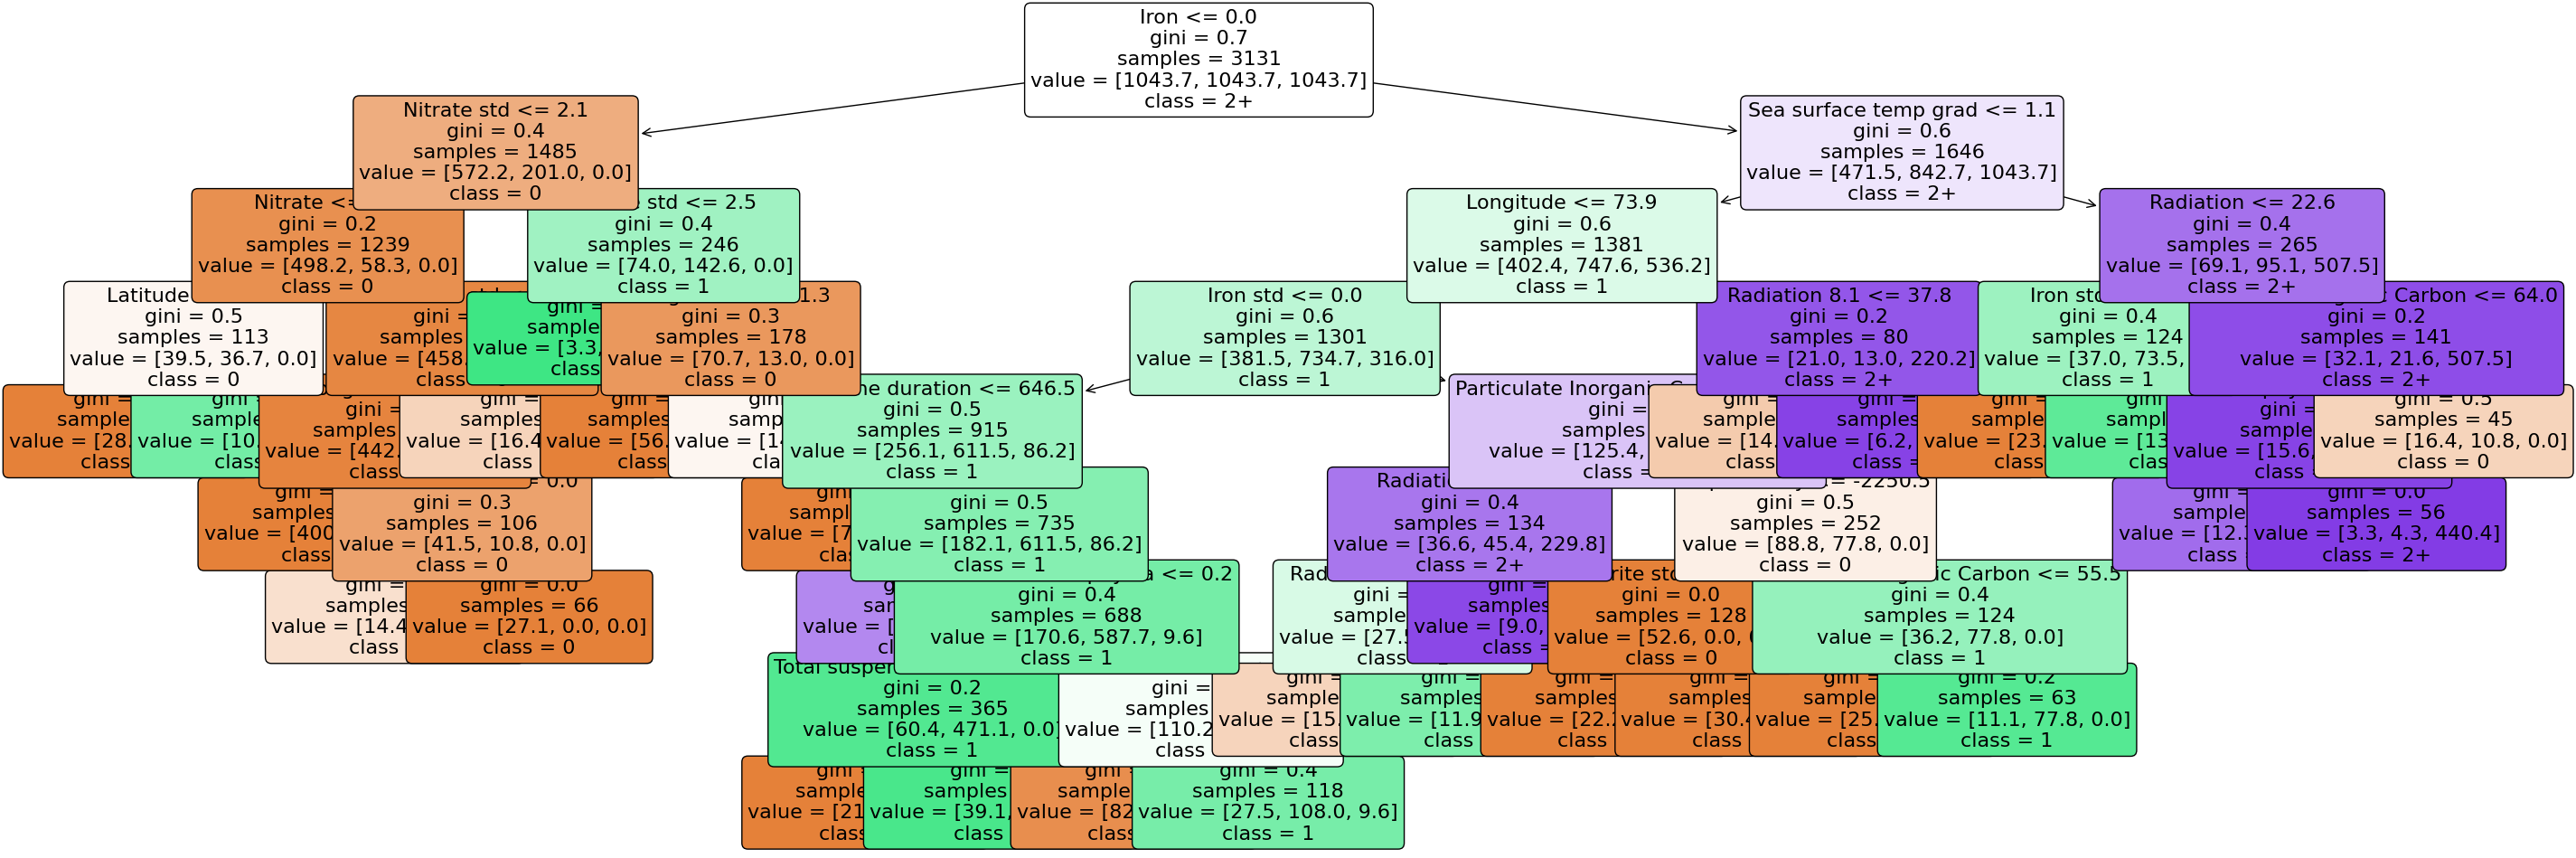

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.utils import shuffle


# Load your dataset into a DataFrame
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_Unique_Dash.csv")

def numeric_columns(df):
    numeric_cols = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numeric_cols.append(col)
    return numeric_cols


numeric_cols = numeric_columns(df)

df = df[numeric_cols]

# Replace values in 'category'
category_replace = {
    0: '0',
    1: '1',
    2: '2+',
    3: '2+',
}

# Apply replacements to 'category'
df['MHWs'] = df['MHWs'].replace(category_replace)

# Shuffle the DataFrame
shuffled_df = shuffle(df, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df.drop(['MHWs', 'No of observations'], axis=1)
y = shuffled_df['MHWs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Define Decision Tree Classifier with desired hyperparameters
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced',
                             max_depth=8, min_samples_split=30,
                             min_samples_leaf=40, max_features=None)

# clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
                             
from sklearn.model_selection import cross_val_score, KFold

# Define KFold with shuffle=True
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with shuffled data
cv_scores = cross_val_score(clf, X, y, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


# Train Decision Tree Classifier on full training data
clf.fit(X_train, y_train)

# Model Evaluation on test data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot Decision Tree
# plt.figure()
plt.figure(figsize=(35,12))
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns,
          class_names=["0", "1", "2+"], fontsize=16, precision=1,
          impurity=True, label='all')
plt.show()



In [3]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df[:10])

                 Feature  Importance
0                   Iron    0.326666
1            Nitrate std    0.185834
2  Sea surface temp grad    0.163186
3              Longitude    0.161839
4              Radiation    0.134115
5                Nitrate    0.028361
6       Sea Surface Temp    0.000000
7           Sea ice conc    0.000000
8     SILVA_species_rich    0.000000
9   SILVA_func_diversity    0.000000


### Feature importance (MHWs number)

(4474, 76)
MHWs
0     3607
1      697
2+     170
Name: count, dtype: int64
(3579, 57) (895, 57) (3579,) (895,)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       714
           1       0.95      0.94      0.94       143
          2+       0.95      0.97      0.96        38

    accuracy                           0.98       895
   macro avg       0.96      0.97      0.96       895
weighted avg       0.98      0.98      0.98       895



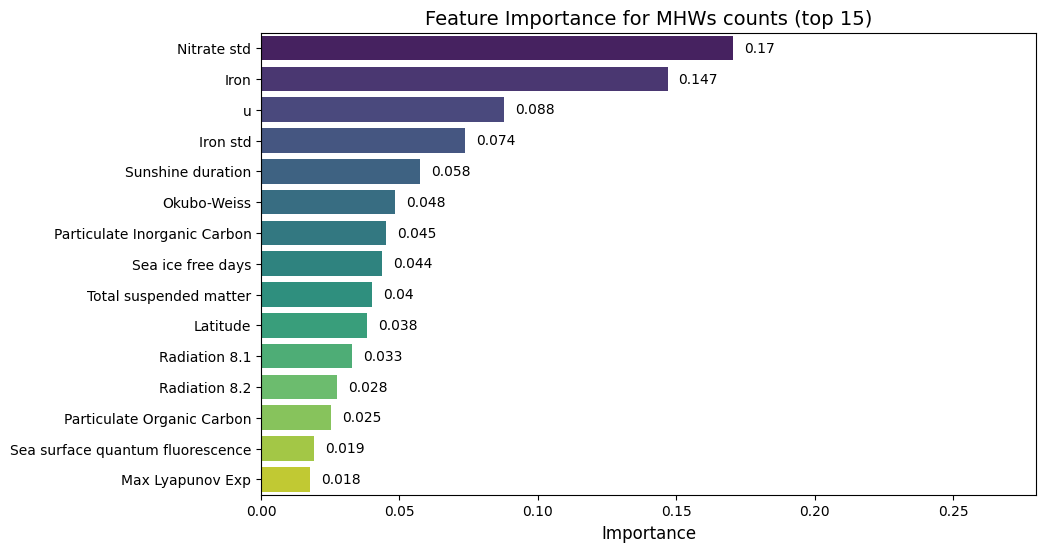

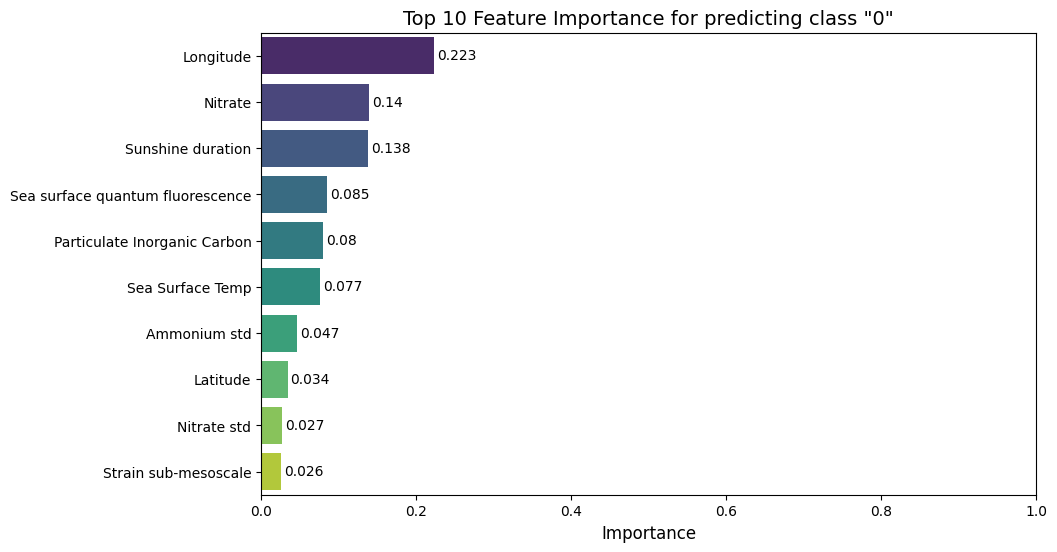

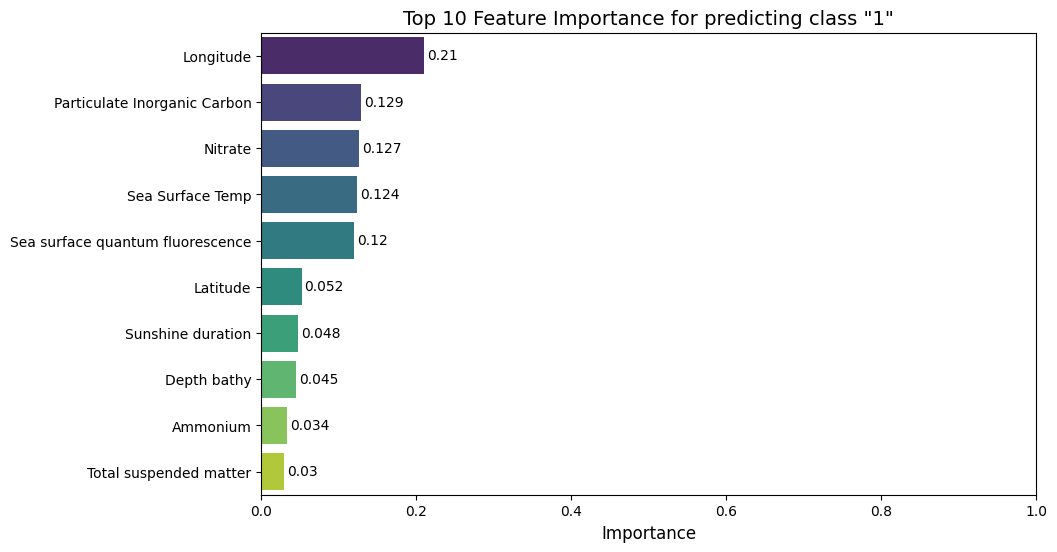

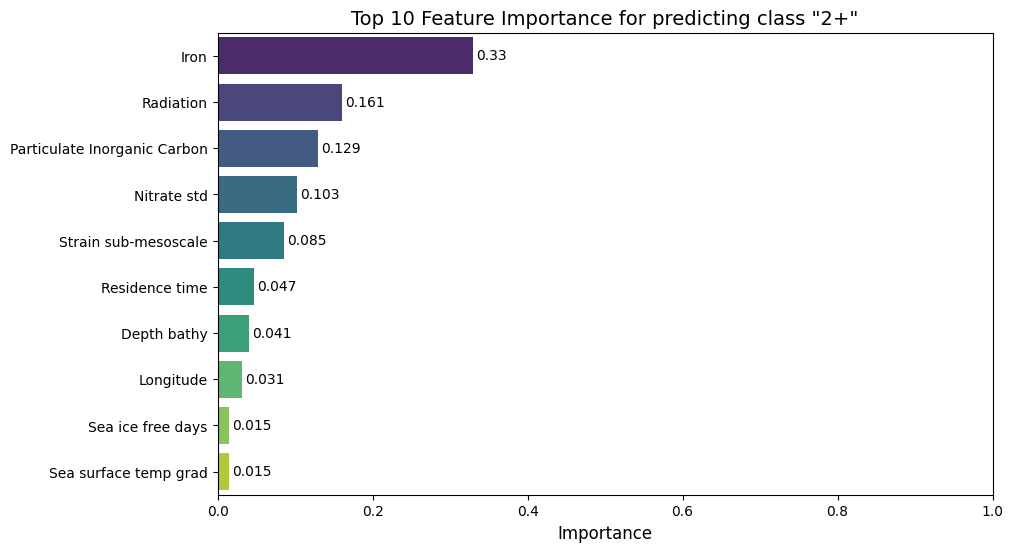

In [4]:
import seaborn as sns

# Load your dataset into a DataFrame
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_Unique_Dash.csv")

def numeric_columns(df):
    numeric_cols = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numeric_cols.append(col)
    return numeric_cols


numeric_cols = numeric_columns(df)
print(df.shape)

# Replace values in 'category'
category_replace = {
    0: '0',
    1: '1',
    2: '2+',
    3: '2+',
}

# Apply replacements to 'category'
df['MHWs'] = df['MHWs'].replace(category_replace)

print(df['MHWs'].value_counts())

df = df[numeric_cols]

# Shuffle the DataFrame
shuffled_df = shuffle(df, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df.drop(['MHWs', 'No of observations'], axis=1)
y = shuffled_df['MHWs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Define Decision Tree Classifier with desired hyperparameters
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train Decision Tree Classifier on full training data
dt.fit(X_train, y_train)

# Model Evaluation on test data
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))


# Get feature importances
feature_importances = dt.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# print(importance_df)


def plot_feature_importance(importance_df, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title(title, fontsize=14)
    plt.xlabel('Importance', fontsize=12)
    # plt.ylabel('Feature', fontsize=12)
    plt.ylabel('')
    plt.xlim((0, 0.28))
    
    # Add numbers beside each bar
    for index, row in importance_df.iterrows():
        plt.text(row['Importance'] + 0.004, index, round(row['Importance'], 3), va='center')

    plt.show()

# Plot feature importance for 'MHWs' prediction
# plot_feature_importance(importance_df.iloc[:27], "Feature Importance for predicting MHWs counts")


# Feature importance per class
class_feature_importance = {}



def plot_feature_importance(importance_df, title, top_n=10, xlim=(0, 0.28)):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.iloc[:top_n],
                palette='viridis', hue='Feature', legend=False)
    plt.title(title, fontsize=14)
    plt.xlabel('Importance', fontsize=12)
    # plt.ylabel('Feature', fontsize=12)
    plt.ylabel('')
    plt.xlim(xlim)
    
    # Add numbers beside each bar
    for index, row in importance_df.iloc[:top_n].iterrows():
        plt.text(row['Importance'] + 0.004, index, round(row['Importance'], 3), va='center')

    plt.show()

# Plot feature importance for 'MHWs' prediction
plot_feature_importance(importance_df.iloc[:27], "Feature Importance for MHWs counts (top 15)", top_n=15)

# Feature importance per class
class_feature_importance = {}

# Iterate over each class
for class_label in dt.classes_:
    # Get binary labels for current class
    y_train_binary = (y_train == class_label)
    
    # Define Decision Tree Classifier for the current class
    dt_class = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    
    # Train Decision Tree Classifier on binary labels
    dt_class.fit(X_train, y_train_binary)
    
    # Get feature importances for the current class
    feature_importances_class = dt_class.feature_importances_
    
    # Create a DataFrame to store feature importances for the current class
    class_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_class})
    
    # Sort the DataFrame by importance and select top 5 features
    class_importance_df = class_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)
    
    # Store the top 5 feature importances in the dictionary
    class_feature_importance[class_label] = class_importance_df

# Plot top 5 feature importance for each class
for class_label, class_importance_df in class_feature_importance.items():
    plot_feature_importance(class_importance_df,
                            f'Top 10 Feature Importance for predicting class "{class_label}"',
                            top_n=10, xlim=(0, 1))



### Classifier #2 (MHWs category)

MHW-category
Moderate    745
Strong      122
Name: count, dtype: int64
MHW-category
None        3607
Moderate     745
Strong       122
Name: count, dtype: int64
(3131, 57) (1343, 57) (3131,) (1343,)
Cross-validation scores: [0.71875    0.72321429 0.77232143 0.76116071 0.7114094  0.7114094
 0.7114094  0.75615213 0.7606264  0.74496644]
Mean CV accuracy: 0.7371419582933844
              precision    recall  f1-score   support

    Moderate       0.53      0.73      0.61       230
        None       0.98      0.76      0.86      1068
      Strong       0.20      0.89      0.33        45

    accuracy                           0.76      1343
   macro avg       0.57      0.79      0.60      1343
weighted avg       0.88      0.76      0.80      1343



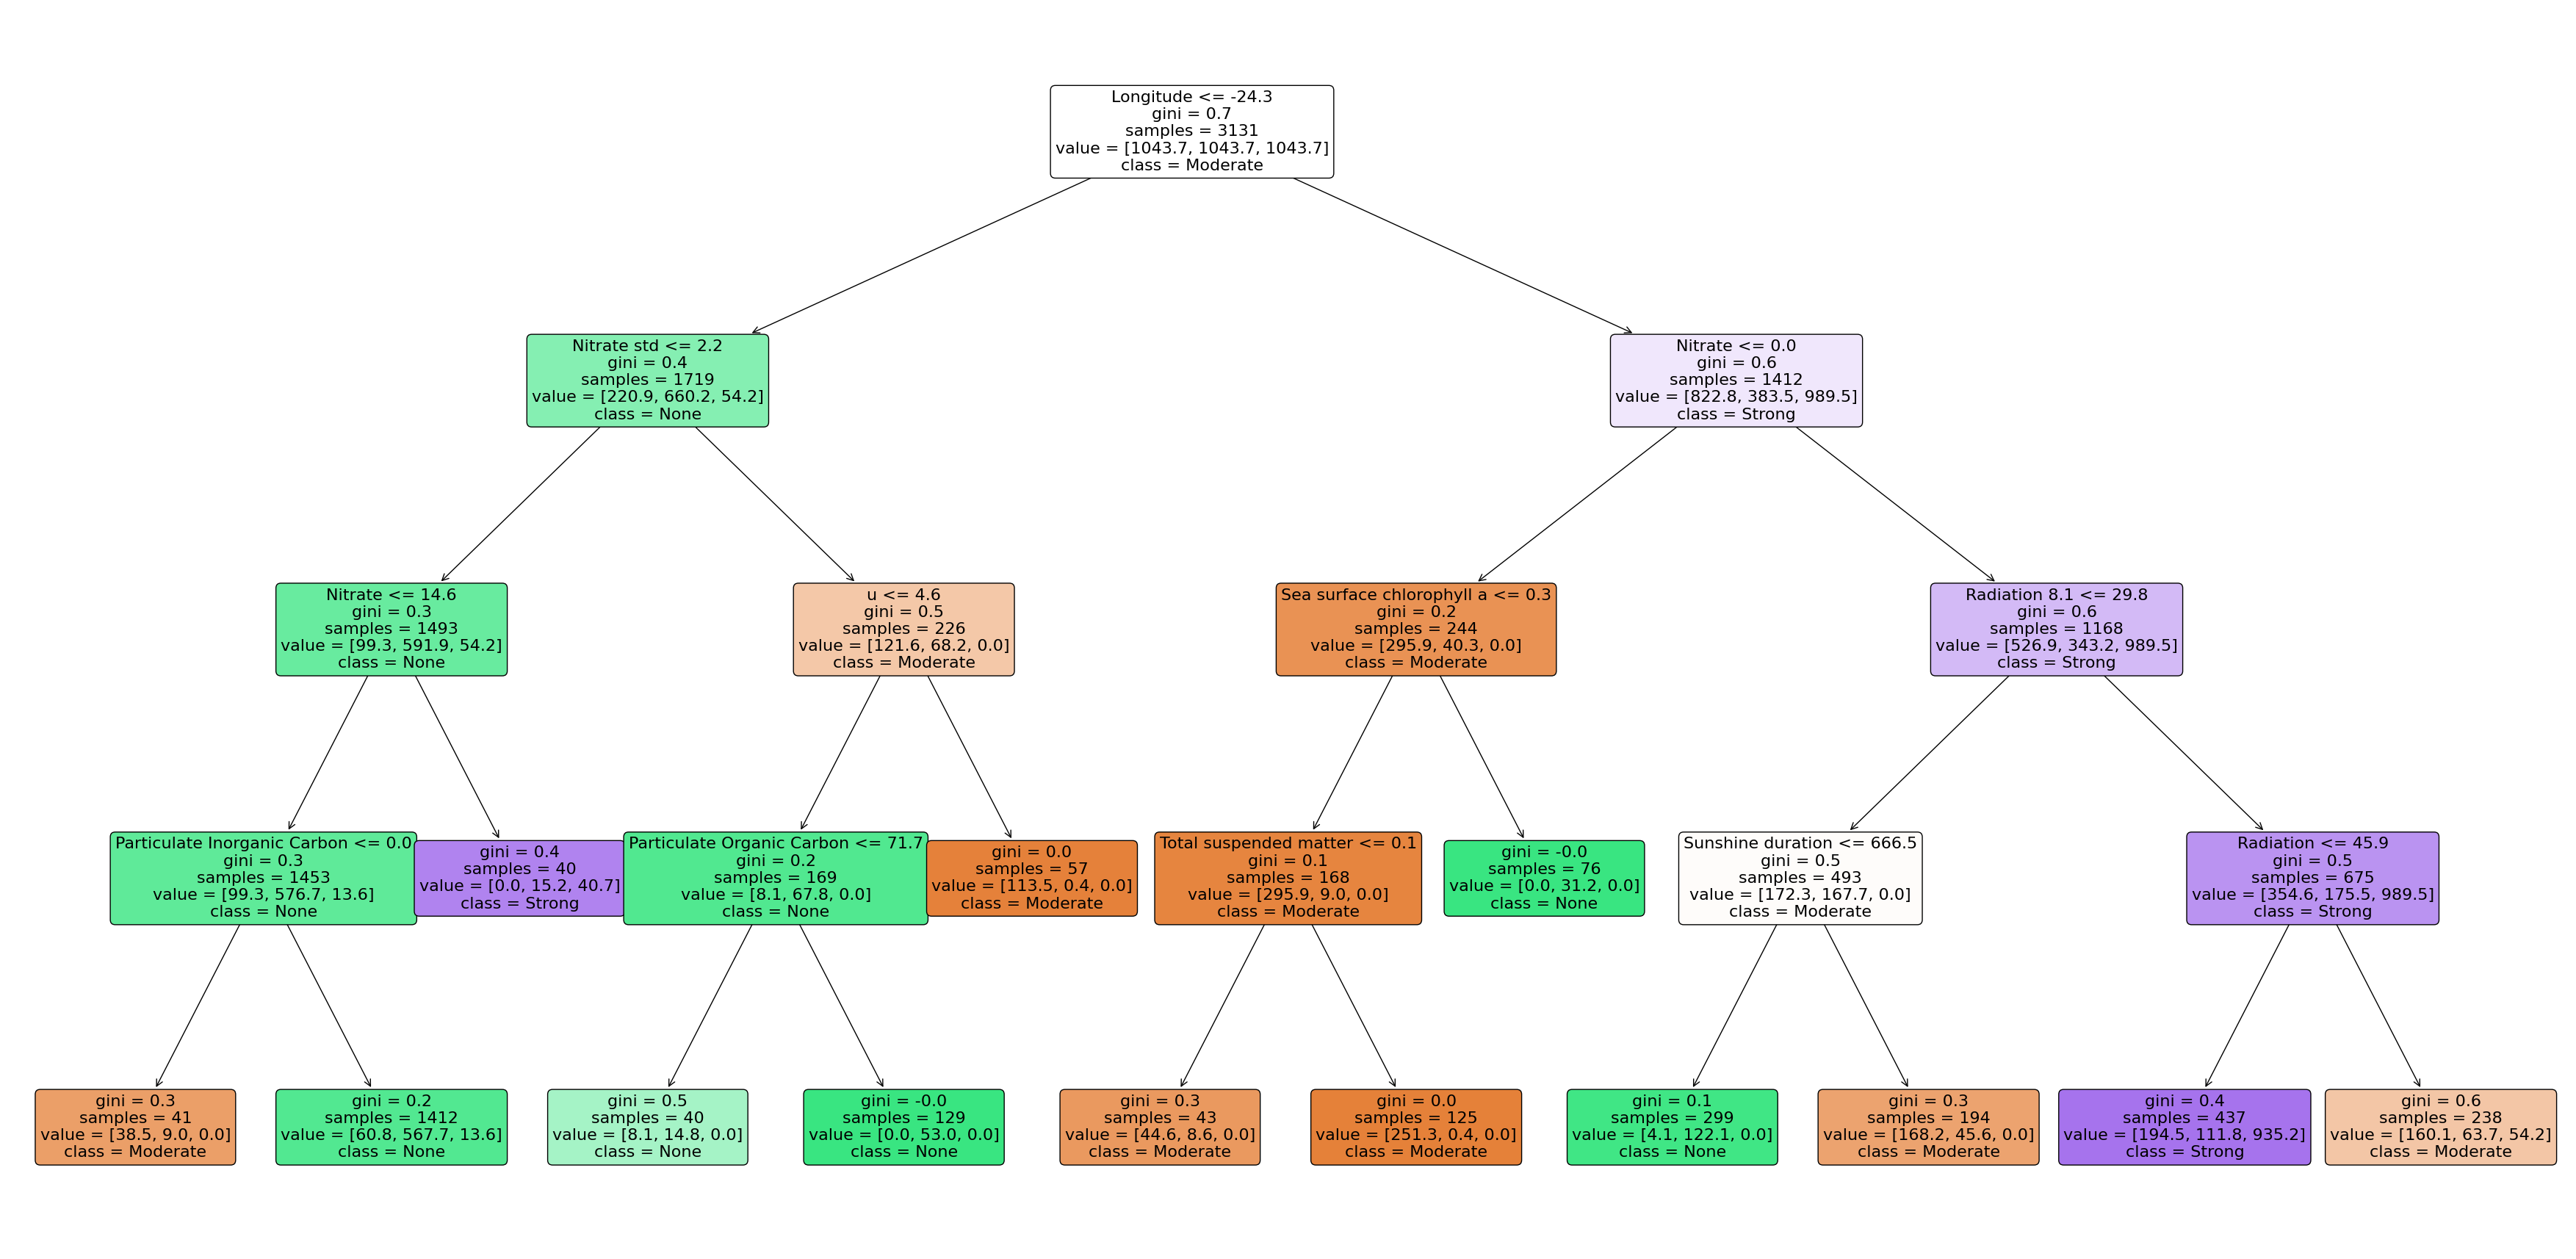

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.utils import shuffle


# Load your dataset into a DataFrame
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_Unique_Dash.csv")


print(df['MHW-category'].value_counts())

df['MHW-category'].fillna("None", inplace=True)

print(df['MHW-category'].value_counts())
# print(df)

# Shuffle the DataFrame
df = shuffle(df, random_state=42)


# Separate features (X) and labels (y) after shuffling
y = df['MHW-category']


def numeric_columns(df):
    numeric_cols = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numeric_cols.append(col)
    return numeric_cols


numeric_cols = numeric_columns(df)

df = df[numeric_cols]


# Separate features (X) and labels (y) after shuffling
X = shuffled_df.drop(['MHWs', 'No of observations'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# # Define Decision Tree Classifier with desired hyperparameters
# clf = DecisionTreeClassifier(random_state=42, class_weight='balanced',
#                              max_depth=4, min_samples_split=5,
#                              min_samples_leaf=40, max_features=None)

clf = DecisionTreeClassifier(random_state=10, class_weight='balanced',
                             max_depth=4, min_samples_split=30,
                             min_samples_leaf=40, max_features=None)


from sklearn.model_selection import cross_val_score, KFold

# Define KFold with shuffle=True
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with shuffled data
cv_scores = cross_val_score(clf, X, y, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Train Decision Tree Classifier on full training data
clf.fit(X_train, y_train)

# Get the class names in the correct order
class_names = clf.classes_


# Model Evaluation on test data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(45,22))
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns,
          class_names=class_names, fontsize=16, precision=1,
          impurity=True, label='all')
plt.show()


# Plot Decision Tree
# plt.figure()
# plt.figure(figsize=(15,12))
# plot_tree(clf, filled=True, feature_names=X.columns,
#           class_names=["Moderate", "None", "Strong"], fontsize=10,
#           impurity=False)
# plt.show()



### Feature importance (MHWs categories)


MHWs categories:
MHW-category
None        3607
Moderate     745
Strong       122
Name: count, dtype: int64
              precision    recall  f1-score   support

    Moderate       0.93      0.95      0.94       155
        None       0.99      0.99      0.99       714
      Strong       0.92      0.88      0.90        26

    accuracy                           0.98       895
   macro avg       0.95      0.94      0.94       895
weighted avg       0.98      0.98      0.98       895



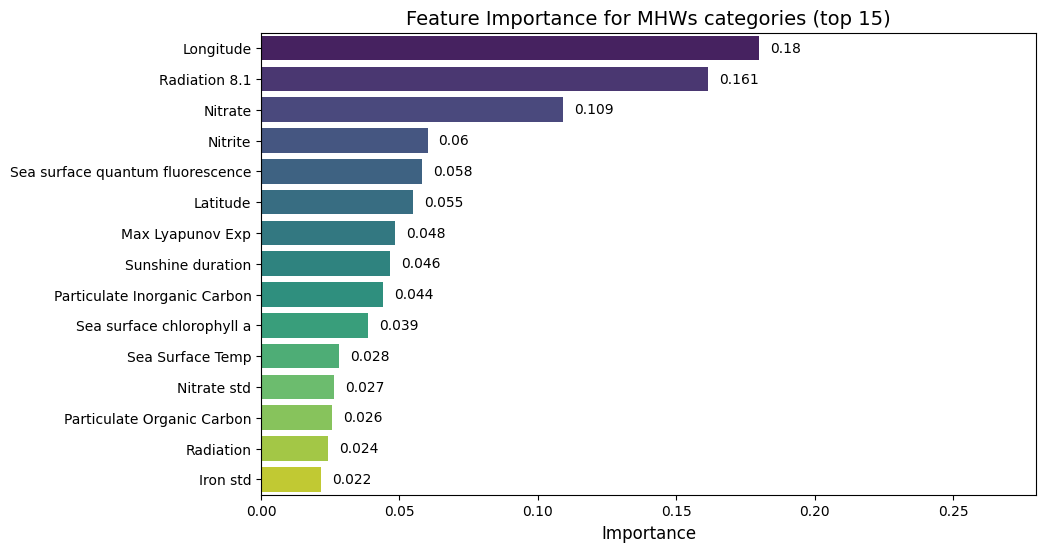

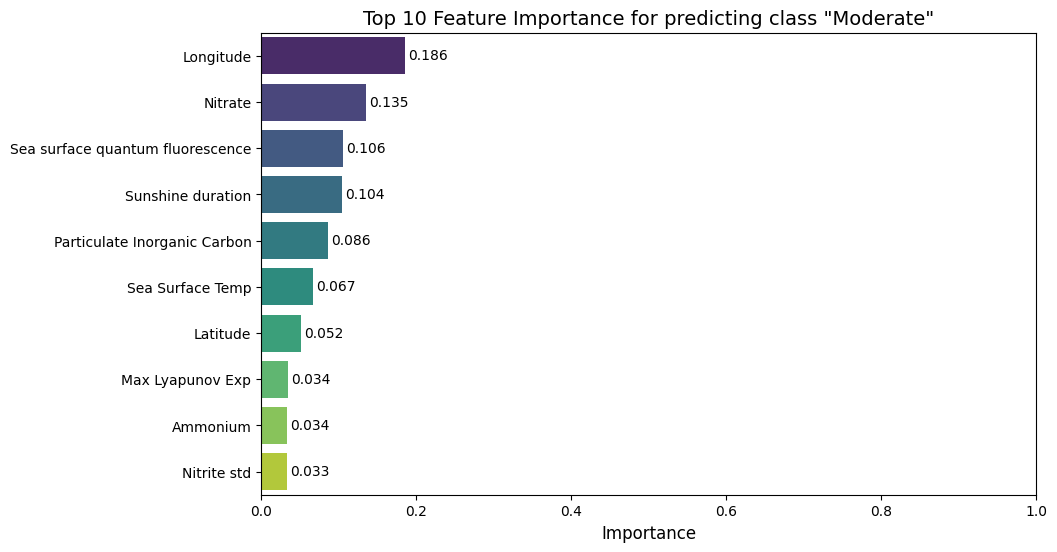

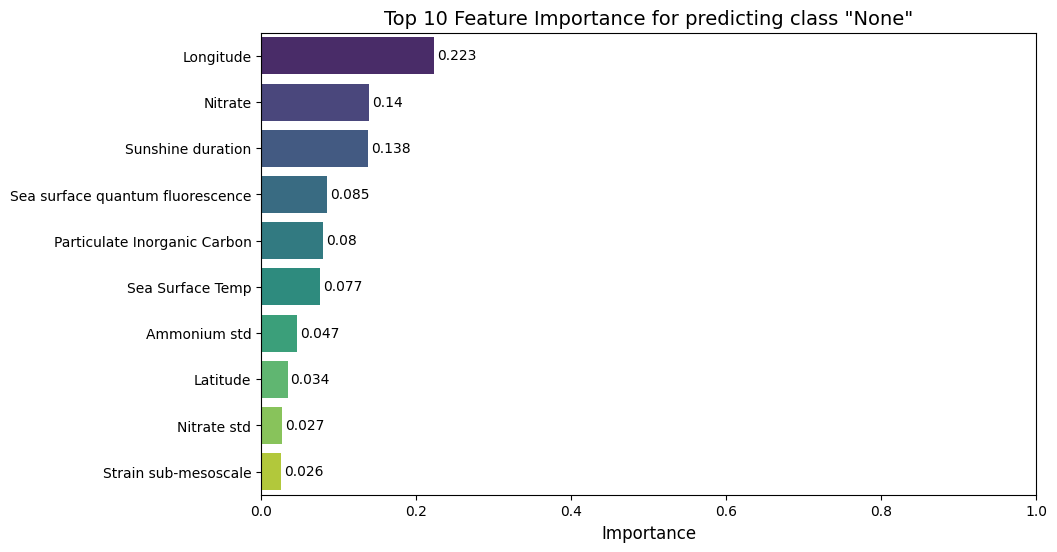

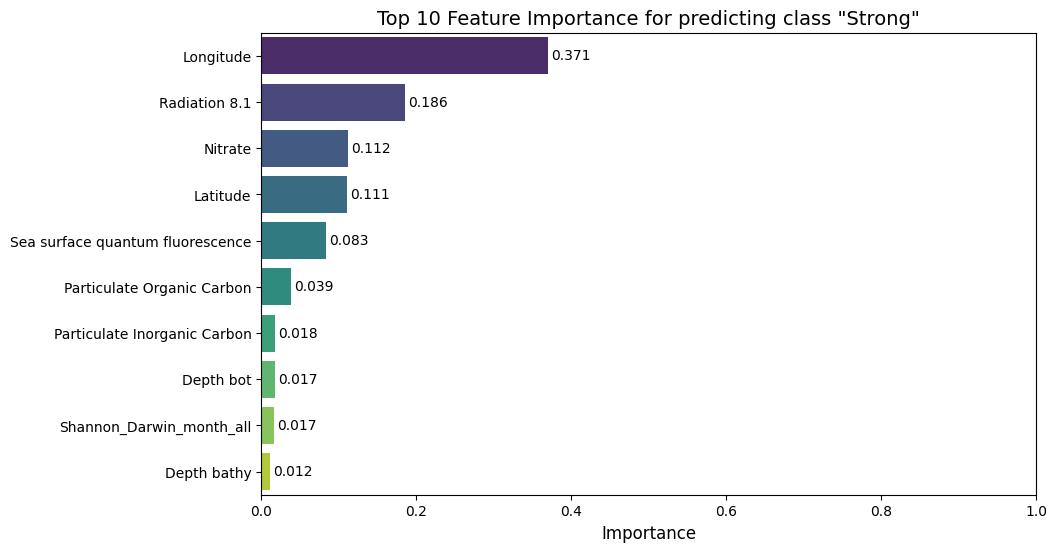

In [14]:

print()
print("MHWs categories:")

df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_Unique_Dash.csv")


df['MHW-category'].fillna("None", inplace=True)

print(df['MHW-category'].value_counts())


# Shuffle the DataFrame
df = shuffle(df, random_state=42)


# Separate features (X) and labels (y) after shuffling
y = df['MHW-category']

numeric_cols = numeric_columns(df)

df = df[numeric_cols]


# Separate features (X) and labels (y) after shuffling
X = shuffled_df.drop(['MHWs', 'No of observations'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Define Decision Tree Classifier with desired hyperparameters
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')


# Train Decision Tree Classifier on full training data
dt.fit(X_train, y_train)

# Model Evaluation on test data
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))


# Get feature importances
feature_importances = dt.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df.reset_index(drop=True)
# print(importance_df)

# Plot feature importance for 'MHW-category' prediction
# plot_feature_importance(importance_df.iloc[:27], "Feature Importance for predicting MHWs categories")


def plot_feature_importance(importance_df, title, top_n=10, xlim=(0, 0.28)):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.iloc[:top_n],
                palette='viridis', hue='Feature', legend=False)
    plt.title(title, fontsize=14)
    plt.xlabel('Importance', fontsize=12)
    # plt.ylabel('Feature', fontsize=12)
    plt.xlim(xlim)
    plt.ylabel('')
    
    # Add numbers beside each bar
    for index, row in importance_df.iloc[:top_n].iterrows():
        plt.text(row['Importance'] + 0.004, index, round(row['Importance'], 3), va='center')

    plt.show()

# Plot feature importance for 'MHWs' prediction
plot_feature_importance(importance_df.iloc[:27], "Feature Importance for MHWs categories (top 15)", top_n=15)

# Feature importance per class
class_feature_importance = {}


# Iterate over each class
for class_label in dt.classes_:
    # Get binary labels for current class
    y_train_binary = (y_train == class_label)
    
    # Define Decision Tree Classifier for the current class
    dt_class = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    
    # Train Decision Tree Classifier on binary labels
    dt_class.fit(X_train, y_train_binary)
    
    # Get feature importances for the current class
    feature_importances_class = dt_class.feature_importances_
    
    # Create a DataFrame to store feature importances for the current class
    class_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_class})
    
    # Sort the DataFrame by importance and select top 5 features
    class_importance_df = class_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)
    
    # Store the top 5 feature importances in the dictionary
    class_feature_importance[class_label] = class_importance_df

# Plot top 5 feature importance for each class
for class_label, class_importance_df in class_feature_importance.items():
    plot_feature_importance(class_importance_df,
                            f'Top 10 Feature Importance for predicting class "{class_label}"',
                            top_n=10, xlim=(0, 1))



### Feature importance - test (a)

In [7]:
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_Unique_Dash.csv")


df['MHW-category'].fillna("None", inplace=True)

# print(df['MHW-category'].value_counts())


# Shuffle the DataFrame
df = shuffle(df, random_state=42)

# Separate features (X) and labels (y) after shuffling
y = df['MHW-category']

numeric_cols = numeric_columns(df)

df = df[numeric_cols]


# Separate features (X) and labels (y) after shuffling
X = shuffled_df.drop(['MHWs', 'No of observations'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Define Decision Tree Classifier with desired hyperparameters
# dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

dt = DecisionTreeClassifier(random_state=42, class_weight='balanced',
                             max_depth=None, min_samples_split=20,
                             min_samples_leaf=40, max_features=None)



# Train Decision Tree Classifier on full training data
dt.fit(X_train, y_train)

# Model Evaluation on test data
y_pred = dt.predict(X_test)

# print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'DT with all features achieved {round(accuracy * 100, 1)}% accuracy.')


# Get feature importances
feature_importances = dt.feature_importances_


importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df.reset_index(drop=True)

importance_df[:5]


DT with all features achieved 86.7% accuracy.


,Feature,Importance
0,Longitude,0.205231
1,Radiation 8.1,0.177120
2,Nitrate,0.118057
3,Nitrite,0.118048
4,Particulate Inorganic Carbon,0.059002


### Classifier - top 5 features (b)

In [8]:

# Tree based on most important features only
top_features = (-feature_importances).argsort()[:5]
print(top_features)

Z_train = X_train.iloc[:, top_features]
Z_test = X_test.iloc[:, top_features]


dt = DecisionTreeClassifier(random_state=42, class_weight='balanced',
                             max_depth=None, min_samples_split=20,
                             min_samples_leaf=40, max_features=5)

# Fit your DT
dt.fit(Z_train, y_train)

# Predict on your test data with your DT
y_test_hat = dt.predict(Z_test)

# Obtain accuracy by using the `accuracy_score` function
accuracy_2 = accuracy_score(y_test_hat, y_test)

# Print results
print(f'DT with only top features achieved {round(accuracy_2 * 100, 1)}% accuracy.')

[12 28 16 18 21]
DT with only top features achieved 83.1% accuracy.


In [9]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df[:10])

                            Feature  Importance
0                         Longitude    0.259338
1                           Nitrate    0.195128
2                     Radiation 8.1    0.154144
3                         Radiation    0.101232
4                 Sunshine duration    0.078220
5                                 u    0.062595
6                       Nitrate std    0.059301
7         Sea surface chlorophyll a    0.049629
8      Particulate Inorganic Carbon    0.038175
9  Sea surface quantum fluorescence    0.002237


In [10]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# # Define Decision Tree Classifier
# clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# # Define parameter grid for GridSearchCV
# param_grid = {
#     'max_depth': [3, 4, 5, 6],
#     'min_samples_split': [5, 10, 15],
#     'min_samples_leaf': [30, 40, 50],
#     'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 1.0]  # Adjust the range as needed
# }

# # Perform Grid Search with cross-validation
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1)
# grid_search.fit(X_train, y_train)

# # Get the best estimator from the grid search
# best_clf = grid_search.best_estimator_

# # Train Decision Tree Classifier on full training data with the best hyperparameters
# best_clf.fit(X_train, y_train)

# # Model Evaluation on test data
# y_pred = best_clf.predict(X_test)
# print(classification_report(y_test, y_pred))

# # Plot Decision Tree
# plt.figure(figsize=(15, 12))
# plot_tree(best_clf, filled=True, feature_names=X.columns,
#           class_names=["0", "1", "2", "3"], fontsize=10,
#           impurity=False)
# plt.show()


In [11]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df[:10])


                            Feature  Importance
0                         Longitude    0.259338
1                           Nitrate    0.195128
2                     Radiation 8.1    0.154144
3                         Radiation    0.101232
4                 Sunshine duration    0.078220
5                                 u    0.062595
6                       Nitrate std    0.059301
7         Sea surface chlorophyll a    0.049629
8      Particulate Inorganic Carbon    0.038175
9  Sea surface quantum fluorescence    0.002237


In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'),
                           param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


Best Parameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.9402015861233737
